In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
plt.style.use('nature')

In [2]:
observed_path = "/media/advait/DATA/research/rcb-project/TSFitPy/input_files/observed_spectra"
# star = "AOHer"
# observed_file = f"{observed_path}/{star}.txt"
# observed_data = np.loadtxt(observed_file, unpack=True)
# obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]

In [3]:
rcb_stars = ["ASAS-RCB-18", "NSV11154", "WISE J1942+", "IRAS 1813+", "VCrA", "AOHer", "ASAS-RCB-21"]
rcb_data = {}
for star in rcb_stars:
    if rcb_stars.index(star) > 4:
        observed_file = f"{observed_path}/{star}.txt"
        observed_data = np.loadtxt(observed_file, unpack=True)
        obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]
        idxs = np.where(obs_flux < 1.1)
        obs_wave = obs_wave[idxs]
        obs_flux = obs_flux[idxs]
        obs_err = obs_err[idxs]
        rcb_data[star] = [obs_wave/1e4, obs_flux, obs_err]


In [4]:
rcb_data

{'AOHer': [array([2.25733002, 2.25733957, 2.25734887, ..., 2.55093144, 2.55093144,
         2.55093144]),
  array([0.8826, 0.8826, 0.8826, ..., 0.707 , 0.707 , 0.707 ]),
  array([0.0382, 0.0382, 0.0382, ..., 0.1947, 0.1947, 0.1947])],
 'ASAS-RCB-21': [array([2.25511031, 2.25511961, 2.25512914, ..., 2.54762238, 2.54762238,
         2.54762238]),
  array([0.7087, 0.7994, 0.7744, ..., 0.3955, 0.3955, 0.3955]),
  array([0.0275, 0.0305, 0.0295, ..., 0.1078, 0.1078, 0.1078])]}

In [5]:
rcb_stars.index("ASAS-RCB-18")

0

In [6]:
CN_synth_data = np.loadtxt(f"{observed_path}/ASAS-RCB-21_CN_synthetic.txt", unpack=True)
CN_wave, CN_flux = CN_synth_data[0], CN_synth_data[1]
CN_wave = CN_wave/1e4

In [7]:
CN_wave

array([2.25481   , 2.25481225, 2.25481451, ..., 2.500295  , 2.5002975 ,
       2.5003    ])

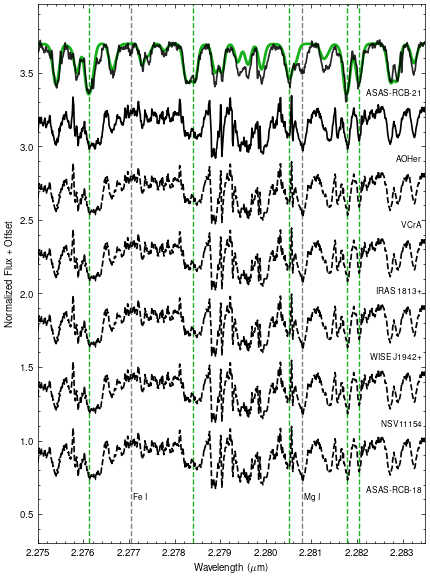

In [8]:
plt.figure(figsize=(5, 7))
plt.xlim(2.275, 2.2835)
# plt.ylim(0.45, 3.8)
offset = 0 
plt.axvline(2.27704, color='gray', linestyle='--')

plt.axvline(2.2808, color='gray', linestyle='--')
plt.text(2.27708, 0.6, "Fe I", fontsize=6, horizontalalignment = 'left')
plt.text(2.28084, 0.6, "Mg I", fontsize=6, horizontalalignment = 'left')

CN_lines = [2.27612, 2.28178, 2.28205, 2.2784 , 2.2805]
for line in CN_lines:
    plt.axvline(line, color='xkcd:green', linestyle='--')

for star in rcb_stars:
    if rcb_stars.index(star) > 4:
        if star == "ASAS-RCB-21":
            plt.plot(CN_wave, CN_flux + offset, 'xkcd:green', lw = 2.0)
            plt.plot(rcb_data[star][0], rcb_data[star][1] + offset, 'k-', lw = 1.2, alpha = 0.85)
        else:
            plt.plot(rcb_data[star][0], rcb_data[star][1] + offset, 'k-', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")

        plt.text(2.2834, 0.65 + offset, star, fontsize=6, horizontalalignment = 'right')
        offset += 0.45
    else:
        star2 = 'AOHer'
        plt.plot(rcb_data[star2][0], rcb_data[star2][1] + offset, 'k--', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")
        plt.text(2.2834, 0.65 + offset, star, fontsize=6, horizontalalignment = 'right')
        
        offset += 0.45

plt.savefig("./plots/RCB_CN.pdf", bbox_inches='tight', dpi=300)

In [9]:
hdc_stars = ["HD182040", "B42","C38",  "A223", "B566", "HD137613"]
hdc_data = {}
for star in hdc_stars:
    if hdc_stars.index(star) > 0:
        observed_file = f"{observed_path}/{star}.txt"
        observed_data = np.loadtxt(observed_file, unpack=True)
        obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]
        idxs = np.where(obs_flux < 1.1)
        obs_wave = obs_wave[idxs]
        obs_flux = obs_flux[idxs]
        obs_err = obs_err[idxs]
        hdc_data[star] = [obs_wave/1e4, obs_flux, obs_err]

In [10]:
CN_synth_data = np.loadtxt(f"{observed_path}/HD137613_CN_synthetic.txt", unpack=True)
CN_wave, CN_flux = CN_synth_data[0], CN_synth_data[1]
CN_wave = CN_wave/1e4

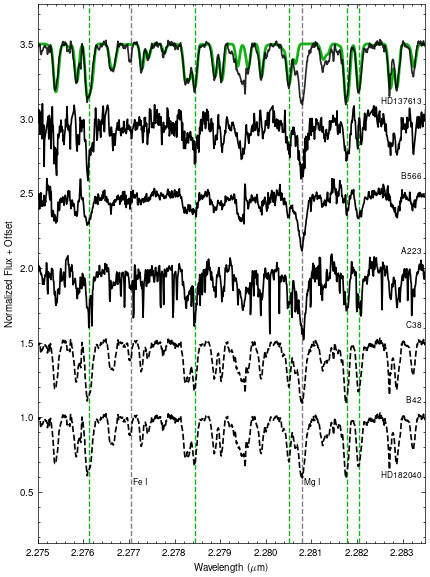

In [11]:
plt.figure(figsize=(5, 7))
plt.xlim(2.275, 2.2835)
# plt.ylim(0.45, 3.8)
offset = 0 
plt.axvline(2.27704, color='gray', linestyle='--')

plt.axvline(2.2808, color='gray', linestyle='--')
plt.text(2.27708, 0.55, "Fe I", fontsize=6, horizontalalignment = 'left')
plt.text(2.28084, 0.55, "Mg I", fontsize=6, horizontalalignment = 'left')

CN_lines = [2.27612, 2.28178, 2.28205, 2.27845 , 2.2805]
for line in CN_lines:
    plt.axvline(line, color='xkcd:green', linestyle='--')

for star in hdc_stars:
    if hdc_stars.index(star) > 1:
        if star == "HD137613":
            plt.plot(CN_wave, CN_flux + offset, 'xkcd:green', lw = 2.0)
            plt.plot(hdc_data[star][0], hdc_data[star][1] + offset, 'k-', lw = 1.2, alpha = 0.85)
        else:
            plt.plot(hdc_data[star][0], hdc_data[star][1] + offset, 'k-', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")

        plt.text(2.2834, 0.6 + offset, star, fontsize=6, horizontalalignment = 'right')
        offset += 0.5
    else:
        star2 = 'HD137613'
        plt.plot(hdc_data[star2][0], hdc_data[star2][1] + offset, 'k--', lw = 1.2)
        plt.ylabel("Normalized Flux + Offset")
        plt.xlabel(r"Wavelength ($\mu$m)")
        plt.text(2.2834, 0.6 + offset, star, fontsize=6, horizontalalignment = 'right')
        offset += 0.5

plt.savefig("./plots/HDC_CN.pdf", bbox_inches='tight', dpi=300)